# Data Science Project SoSe 2024
## Team 07
- Maximilian Hoffmann
- Kilian Kempf
- Daniel Schneider
- Tom Schuck

## Project Submission

### Data Initialization

In [1]:
import os

import pandas as pd

from data_management import DataManager

DATA_DIR = os.path.join(os.getcwd(), 'data/Instacart')

op_prior = pd.read_csv(os.path.join(DATA_DIR, 'order_products__prior.csv.zip'))
op_train = pd.read_csv(os.path.join(DATA_DIR, 'order_products__train.csv.zip'))

tip_train = pd.read_csv(os.path.join(DATA_DIR, 'tip_trainingsdaten1_.csv'))[['order_id', 'tip']]
tip_test = pd.read_csv(os.path.join(DATA_DIR, 'tip_testdaten1_template.csv'))

orders = pd.read_csv(os.path.join(DATA_DIR, 'orders.csv.zip'))
aisles = pd.read_csv(os.path.join(DATA_DIR, 'aisles.csv.zip'))
departments = pd.read_csv(os.path.join(DATA_DIR, 'departments.csv.zip'))
products = pd.read_csv(os.path.join(DATA_DIR, 'products.csv.zip'))

data_manager = DataManager(op_prior, op_train, tip_train, tip_test, orders, products, aisles, departments)
order_amount = len(data_manager.get_orders_tip())

### Feature Engineering

In [2]:
from feature_engineering.static_features import TipHistory, ReorderedRatio, OrderSize, PrevTippedProductsRatio, \
    CustomerLifetime, PrevOrderTipped, OrderFrequency, SimOrdersTipRatio, AvgSizePrevOrders, MeanOrderedRate, \
    LastTipSequence, RelDaysSinceTip, DaysSinceTip, OrderNumberSquared, HodHighTipProbability, DowHighTipProbability, \
    ContainsAlcohol

from feature_engineering.dynamic_features import ProductTipRate, DepartmentTipRate, AisleTipRate, DynamicFeatureTest1, \
    DynamicFeatureTest2, AssocRulesAisles, AssocRulesDepartments

# Kilian
tip_history = TipHistory()
reordered_rate = ReorderedRatio()
order_size = OrderSize()
prev_tipped_products_ratio = PrevTippedProductsRatio()
customer_lifetime = CustomerLifetime()
prev_order_tipped = PrevOrderTipped()

# Daniel
order_frequency = OrderFrequency()
mean_ordered_rate = MeanOrderedRate()
rel_days_since_tip = RelDaysSinceTip()
days_since_tip = DaysSinceTip()

# Max
sim_orders_tip_ratio = SimOrdersTipRatio()
product_tip_rate = ProductTipRate()
department_tip_rate = DepartmentTipRate()
aisle_tip_rate = AisleTipRate()
last_tip_sequence = LastTipSequence()

# Tom
avg_size_prev_orders = AvgSizePrevOrders()

# Features analysis
order_number_squared = OrderNumberSquared()
hod_high_tip_probability = HodHighTipProbability()
dow_high_tip_probability = DowHighTipProbability()
contains_alcohol = ContainsAlcohol()

assoc_rules_departments = AssocRulesDepartments()
assoc_rules_aisles = AssocRulesAisles()

# Test
dynamic_feature_test_1 = DynamicFeatureTest1()
dynamic_feature_test_2 = DynamicFeatureTest2()

In [3]:
# Static Features
data_manager.register_feature(tip_history)
data_manager.register_feature(reordered_rate)
data_manager.register_feature(order_size)
data_manager.register_feature(customer_lifetime)
data_manager.register_feature(prev_order_tipped)
data_manager.register_feature(prev_tipped_products_ratio)

data_manager.register_feature(order_frequency)
data_manager.register_feature(sim_orders_tip_ratio)
data_manager.register_feature(avg_size_prev_orders)
data_manager.register_feature(mean_ordered_rate)
data_manager.register_feature(last_tip_sequence)
data_manager.register_feature(rel_days_since_tip)
data_manager.register_feature(days_since_tip)

data_manager.register_feature(order_number_squared)
data_manager.register_feature(hod_high_tip_probability)
data_manager.register_feature(dow_high_tip_probability)
data_manager.register_feature(contains_alcohol)

# Dynamic Features
data_manager.register_feature(dynamic_feature_test_1)
data_manager.register_feature(dynamic_feature_test_2)
data_manager.register_feature(product_tip_rate)
data_manager.register_feature(department_tip_rate)
data_manager.register_feature(aisle_tip_rate)

# data_manager.register_feature(assoc_rules_departments)
# data_manager.register_feature(assoc_rules_aisles)

In [4]:
# data_manager.compute_features()

In [5]:
data_manager.get_orders_tip().head(100)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,tip
0,2539329,1,prior,1,2,8,NaN,0.0
1,2398795,1,prior,2,3,7,15.0,0.0
2,473747,1,prior,3,3,12,21.0,0.0
3,2254736,1,prior,4,4,7,29.0,0.0
4,431534,1,prior,5,4,15,28.0,0.0
...,...,...,...,...,...,...,...,...
95,1916106,12,prior,3,5,8,14.0,0.0
96,1057378,12,prior,4,3,9,26.0,0.0
97,221248,12,prior,5,1,9,30.0,0.0
98,2618231,13,prior,1,6,12,NaN,0.0


In [6]:
# data_manager.export_features('data/prepared_data/computed_features.csv.zip', only_static=False)

In [7]:
data_manager.import_features('data/prepared_data/computed_features.csv.zip', only_static=False)

In [8]:
data_manager.calculate_feature_correlations(only_static=False)

                       Feature  Correlation
0                  tip_history     0.559060
1            prev_order_tipped     0.490379
2         sim_orders_tip_ratio     0.411784
3   prev_tipped_products_ratio     0.396700
4            last_tip_sequence     0.331300
5               days_since_tip    -0.297107
6             product_tip_rate     0.279374
7               aisle_tip_rate     0.245334
8                dept_tip_rate     0.230541
9              order_frequency    -0.192789
10      days_since_prior_order    -0.146384
11    dow_high_tip_probability     0.140463
12            contains_alcohol     0.121162
13          rel_days_since_tip    -0.120450
14             reordered_ratio     0.116099
15                order_number     0.098888
16    hod_high_tip_probability     0.088258
17           customer_lifetime     0.077927
18           mean_ordered_rate     0.058233
19        order_number_squared     0.057033
20        avg_size_prev_orders    -0.013932
21      dynamic_feature_test_1  

In [9]:
# data_manager.analyse_each_feature(only_static=False)

In [10]:
data_manager.get_orders_tip().shape

(3346083, 30)

In [11]:
data_manager.get_orders_tip().head(100)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,tip,tip_history,last_tip_sequence,...,rel_days_since_tip,days_since_tip,hod_high_tip_probability,mean_ordered_rate,prev_tipped_products_ratio,aisle_tip_rate,dynamic_feature_test_1,product_tip_rate,dept_tip_rate,dynamic_feature_test_2
0,2539329,1,prior,1,2,8,NaN,0.0,NaN,0.0,...,NaN,NaN,0,NaN,NaN,-0.154412,0.090909,-0.214783,-0.136680,0.090909
1,2398795,1,prior,2,3,7,15.0,0.0,0.0,0.0,...,NaN,NaN,0,0.500000,0.0,-0.128714,0.181818,-0.126002,-0.128948,0.181818
2,473747,1,prior,3,3,12,21.0,0.0,0.0,0.0,...,NaN,NaN,0,0.500000,0.0,-0.162890,0.272727,-0.134117,-0.153835,0.272727
3,2254736,1,prior,4,4,7,29.0,0.0,0.0,0.0,...,NaN,NaN,0,0.666667,0.0,-0.152853,0.363636,-0.185615,-0.136680,0.363636
4,431534,1,prior,5,4,15,28.0,0.0,0.0,0.0,...,NaN,NaN,0,0.437500,0.0,-0.072083,0.454545,-0.063549,-0.091502,0.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1916106,12,prior,3,5,8,14.0,0.0,0.0,0.0,...,NaN,NaN,0,0.125000,0.0,-0.187044,0.600000,-0.161177,-0.169895,0.600000
96,1057378,12,prior,4,3,9,26.0,0.0,0.0,0.0,...,NaN,NaN,0,0.083333,0.0,-0.102275,0.800000,-0.092866,-0.115211,0.800000
97,221248,12,prior,5,1,9,30.0,0.0,0.0,0.0,...,NaN,NaN,0,0.102273,0.0,-0.125295,1.000000,-0.090662,-0.114649,1.000000
98,2618231,13,prior,1,6,12,NaN,0.0,NaN,0.0,...,NaN,NaN,0,NaN,NaN,-0.062865,0.076923,-0.096765,-0.067655,0.076923


In [12]:
# test = data_manager.get_orders_tip()

In [13]:
# print(f"Number of orders: {len(data_manager.get_orders_tip())}")
# print(f"Number of orders did not change: {order_amount == len(data_manager.get_orders_tip())}\n")
# print(f"Number of NaN or null values in each column:\n{data_manager.get_orders_tip().isnull().sum()}")

In [14]:
# order_ids = data_manager.get_orders_tip(complete=True).groupby('user_id')['order_id'].head(5)
# order_amount = len(order_ids)

In [15]:
# data_manager.set_subset(order_ids)

In [16]:
# data_manager.get_orders_tip().head(25)

In [17]:
# print(f"Number of orders: {len(data_manager.get_orders_tip())}")
# print(f"Number of orders did not change: {order_amount == len(data_manager.get_orders_tip())}\n")
# print(f"Number of NaN or null values in each column:\n{data_manager.get_orders_tip().isnull().sum()}")

In [18]:
# order_ids = data_manager.get_orders_tip(complete=True).groupby('user_id')['order_id'].head(4)
# order_amount = len(order_ids)
# 
# data_manager.set_subset(order_ids)
# data_manager.get_orders_tip().head(25)

In [19]:
# print(f"Number of orders: {len(data_manager.get_orders_tip())}")
# print(f"Number of orders did not change: {order_amount == len(data_manager.get_orders_tip())}\n")
# print(f"Number of NaN or null values in each column:\n{data_manager.get_orders_tip().isnull().sum()}")

### Analysis
- Only orders from the training set (orders with tip information) are considered

In [20]:
# from analysis import DayOfWeek, HourOfDay, DaysSincePriorOrder, OrderNumber, Department, Aisle, Product, GeneralAnalysis

In [21]:
# day_of_week = DayOfWeek(data_manager)
# hour_of_day = HourOfDay(data_manager)
# days_since_prior_order = DaysSincePriorOrder(data_manager)
# order_number = OrderNumber(data_manager)
# department = Department(data_manager)
# aisle = Aisle(data_manager)
# product = Product(data_manager)
# number_order_user = NumberOrderUser(data_manager)
# general_analysis = GeneralAnalysis(data_manager)

In [22]:
# day_of_week.execute_analysis()

In [23]:
# hour_of_day.execute_analysis()

In [24]:
# days_since_prior_order.execute_analysis()

In [25]:
# order_number.execute_analysis()

In [26]:
# department.execute_analysis()

In [27]:
# aisle.execute_analysis()

In [28]:
# product.execute_analysis()

In [29]:
# number_order_user.execute_analysis()

### Data Preparation

In [30]:
from feature_engineering.static_features import DowHighTipProbability, HodHighTipProbability, OrderNumberSquared, \
    ContainsAlcohol

data_manager.register_feature(DowHighTipProbability())
data_manager.register_feature(HodHighTipProbability())
data_manager.register_feature(OrderNumberSquared())
data_manager.register_feature(ContainsAlcohol())

In [31]:
# data_manager.compute_features()

### Model Training & Evaluation

Order is important:
- Remove first order of each user and assign the dataset for parameter tuning
- Initialize cross-validation splitter
- Export splits
- Tune the parameters of the model with the dataset from 1.

In [32]:
from data_management.cross_validation import LastOrderUserTSCVSplitter

In [33]:
orders_tip = data_manager.get_orders_tip()
orders_tip.shape

(3346083, 30)

In [34]:
orders_tip_train = data_manager.get_orders_tip_train()
orders_tip_train.shape

(3214874, 30)

In [35]:
orders_tip_test = data_manager.get_orders_tip_test()
orders_tip_test.shape

(131209, 30)

In [36]:
data_manager.remove_first_orders()

In [37]:
orders_tip_train = data_manager.get_orders_tip_train().copy()
orders_tip_train.shape

(3008665, 30)

In [38]:
last_order_user_tscv_splitter = LastOrderUserTSCVSplitter(data_manager, n_splits=5)

In [39]:
# last_order_user_tscv_splitter.export_splits('data/prepared_data/')

In [40]:
# user_tscv_splitter = UserTSCVSplitter(data_manager, n_splits=5, validation_set_ratio=0.2, seed=42)

In [41]:
# user_tscv_splitter.export_splits('data/prepared_data/')

In [42]:
# features = ['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'order_size', 'tip_history',
#             'dynamic_feature_test_1', 'dynamic_feature_test_2']
#
# prepared_splits_dict = user_tscv_splitter.import_splits('data/prepared_data/', features)

In [43]:
from data_management import DatasetSelector
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from data_management import get_best_cv_scores, estimate_accuracy, eval_logreg
from sklearn.naive_bayes import GaussianNB

In [44]:
features_core = ['order_number', 'days_since_prior_order', 'tip_history', 'customer_lifetime', 'reordered_ratio',
                 'order_frequency', 'last_tip_sequence', 'contains_alcohol', 'prev_order_tipped',
                 'prev_tipped_products_ratio', 'sim_orders_tip_ratio', 'aisle_tip_rate', 'dept_tip_rate',
                 'product_tip_rate', 'order_number_squared']

features_ordinal = ['order_dow', 'order_hour_of_day']
features_ordinal_replacement = ['dow_high_tip_probability', 'hod_high_tip_probability']
features_with_na = ['rel_days_since_tip', 'days_since_tip']

In [105]:
features_numeric = features_core + features_ordinal_replacement

prepared_splits_numeric = last_order_user_tscv_splitter.import_splits('data/prepared_data/', features_numeric)

In [57]:
X_num = orders_tip_train[features_numeric]
y_num = orders_tip_train['tip'].astype(bool)

### Multi-Layer Perceptron

In [58]:
pipeline_steps = [('selector', DatasetSelector(prepared_splits_numeric)),
                  ('scaler', StandardScaler()),
                  ('mlp', MLPClassifier())]

pipeline = Pipeline(pipeline_steps, verbose=False)

# param_grid = {
#     'mlp__hidden_layer_sizes': [(10,), (50,), (100,), (5, 5), (10, 10), (25, 25)],
#     'mlp__activation': ['relu'],
#     'mlp__alpha': [0.001, 0.01, 0.1],
#     'mlp__max_iter': [100, 500, 750]
# } -> Top: 0.814843, Mean: 0.803884
param_grid = {
    'mlp__hidden_layer_sizes': [(15,)],
    'mlp__activation': ['relu'],
    'mlp__alpha': [0.01],
}

# param_grid = {'mlp__activation': 'relu',
#  'mlp__alpha': 0.01,
#  'mlp__hidden_layer_sizes': (25, 25),
#  'mlp__max_iter': 750}
# -> Top: 0.815891, Mean: 0.804765
grid_search_clf = GridSearchCV(pipeline, param_grid, cv=last_order_user_tscv_splitter, scoring='accuracy', verbose=1,
                               n_jobs=5, return_train_score=True)
grid_search_clf.fit(X_num, y_num)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=LastOrderUserTSCVSplitter(data_manager=<data_management.data_manager.DataManager object at 0x000002E9DCA1CED0>,
                                          n_splits=5),
             estimator=Pipeline(steps=[('selector',
                                        DatasetSelector(prepared_splits_dict={-8070716829487604255:          order_number  days_since_prior_order  tip_history  reordered_ratio  \
0                   2                    15.0     0.000000            0.500   
1                   3                    21.0     0.000000            0.600   
2                   4                    29.0     0.000000            1.00...
3008656                    25                         0   
3008657                    36                         1   
3008658                    49                         0   
3008659                    64                         0   

         hod_high_tip_probability  
0                               0  
1                               0  
2                               0  
3                               0  
9                               0  
...                           ...  
3008655                         0  
3008656                         0  
3008657                         0  
3008658                         0  
3008659                         0  

[2104923 rows x 16 columns]})),
                                       ('scaler', StandardScaler()),
                                       ('mlp', MLPClassifier())]),
             n_jobs=5,
             param_grid={'mlp__activation': ['relu'], 'mlp__alpha': [0.01],
                         'mlp__hidden_layer_sizes': [(15,)]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [59]:
scores = get_best_cv_scores(grid_search_clf)
scores

,Test Accuracy,Train Accuracy
Fold 1,0.814441,0.778584
Fold 2,0.810765,0.776415
Fold 3,0.803856,0.774308
Fold 4,0.798233,0.772744
Fold 5,0.792023,0.771244
Mean,0.803863,0.774659


In [71]:
grid_search_clf.best_params_

{'mlp__activation': 'relu',
 'mlp__alpha': 0.01,
 'mlp__hidden_layer_sizes': (15,)}

### Logistic Regression

In [ ]:
pipeline_steps = [('selector', DatasetSelector(prepared_splits_numeric)),
                  ('scaler', StandardScaler()),
                  ('logreg', LogisticRegression())]

pipeline = Pipeline(pipeline_steps, verbose=False)

# param_grid = {
#     'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'logreg__solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
# }
param_grid = {
    'logreg__max_iter': [1000],
    'logreg__C': [0.001],
    'logreg__solver': ['sag'],
}
# {'logreg__C': 0.001, 'logreg__solver': 'sag'} - 
# Mean: 0.802477
# Top: 0.813330


grid_search_clf = GridSearchCV(pipeline, param_grid, cv=last_order_user_tscv_splitter, scoring='accuracy', verbose=1,
                               n_jobs=5, return_train_score=True)
grid_search_clf.fit(X_num, y_num)

Coefficients: [[-0.31155412 -0.02368891  0.80238014  0.13186797 -0.14164389 -0.25503389
   0.6271268   0.07953402  0.32125894  0.29804917 -0.04322853 -0.01672614
   0.24351759  0.27488682  0.1054206   0.41418298  0.27832532]]


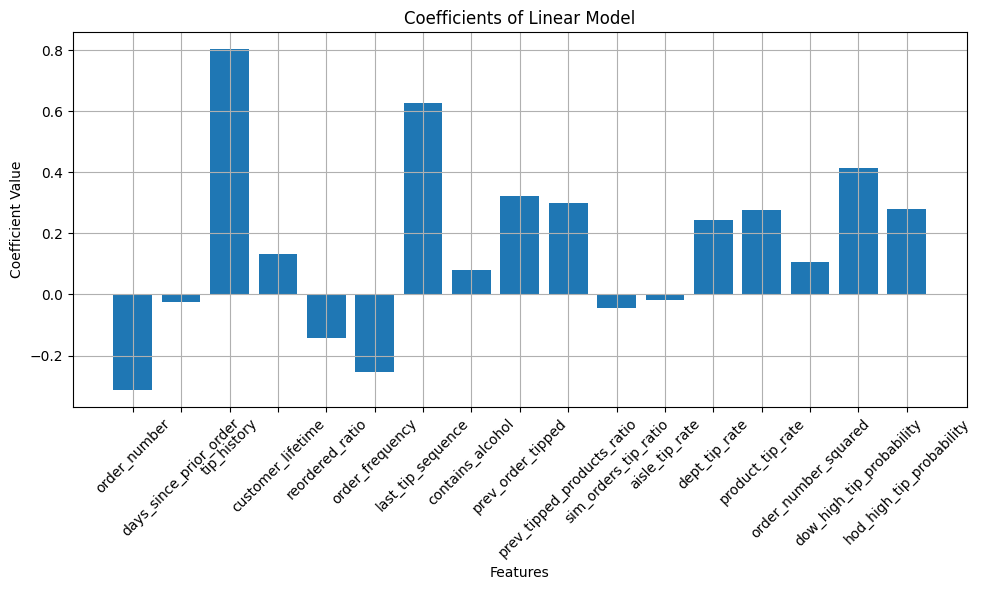

In [64]:
eval_logreg(grid_search_clf, features_numeric)

In [65]:
scores = get_best_cv_scores(grid_search_clf)
scores

,Test Accuracy,Train Accuracy
Fold 1,0.813350,0.776854
Fold 2,0.808830,0.774417
Fold 3,0.801913,0.772394
Fold 4,0.797224,0.770626
Fold 5,0.791067,0.769223
Mean,0.802477,0.772703


In [67]:
grid_search_clf.best_params_

{'logreg__C': 0.001, 'logreg__max_iter': 1000, 'logreg__solver': 'sag'}

### Gaussian Naive Bayes

In [ ]:
pipeline_steps = [('selector', DatasetSelector(prepared_splits_numeric)),
                  ('scaler', StandardScaler()),
                  ('nb', GaussianNB())]

pipeline = Pipeline(pipeline_steps, verbose=False)
# param_grid = {
#     'nb__var_smoothing': [1e-9, 1e-10, 1e-11]
# }
param_grid = {
    'nb__var_smoothing': [1e-9]  # Variation smoothing parameter
}
# {'nb__var_smoothing': 1e-09} - 0.7841381709885383

grid_search_clf = GridSearchCV(pipeline, param_grid, cv=last_order_user_tscv_splitter, scoring='accuracy', verbose=1,
                               n_jobs=5, return_train_score=True)
grid_search_clf.fit(X_num, y_num)

In [ ]:
scores = get_best_cv_scores(grid_search_clf)
scores

In [ ]:
accuracy = estimate_accuracy(grid_search_clf)
accuracy

### Decision Tree

In [45]:
features = features_core + features_ordinal + features_with_na
prepared_splits = last_order_user_tscv_splitter.import_splits('data/prepared_data/', features)

In [46]:
X_disc = orders_tip_train[features]
y_disc = orders_tip_train['tip'].astype(bool)

In [ ]:
pipeline_steps = [('selector', DatasetSelector(prepared_splits)),
                  ('decision_tree', DecisionTreeClassifier())]

pipeline = Pipeline(pipeline_steps, verbose=False)

# param_grid = {
#     'decision_tree__criterion': ['entropy'],
#     'decision_tree__max_depth': [2 ** i for i in range(5, 15)],
#     'decision_tree__min_samples_leaf': [2 ** i for i in range(5, 20)]
# }

param_grid = {
    'decision_tree__criterion': ['entropy'],
    'decision_tree__max_depth': [10],
    'decision_tree__min_samples_leaf': [500]
}

grid_search_clf = GridSearchCV(pipeline, param_grid, cv=last_order_user_tscv_splitter, scoring='accuracy', verbose=1,
                               n_jobs=5, return_train_score=True)
grid_search_clf.fit(X_disc, y_disc)

In [ ]:
scores = get_best_cv_scores(grid_search_clf)
scores

In [ ]:
grid_search_clf.best_params_

### XGBoost

In [51]:
pipeline_steps = [('selector', DatasetSelector(prepared_splits)),
                  ('xgb', XGBClassifier(use_label_encoder=False))]

pipeline = Pipeline(pipeline_steps, verbose=False)

# param_grid = {'xgb__n_estimators': [2 ** i for i in range(2, 8)],
#               'xgb__max_depth': [2 ** i for i in range(2, 8)],
#               'xgb__learning_rate': [0.01, 0.1],
#               'xgb__subsample': [0.4, 0.6, 0.8]}

# param_grid = {
#     'xgb__learning_rate': [0.1],
#     'xgb__max_depth': [5],
#     'xgb__n_estimators': [100],
#     'xgb__subsample': [0.6]
# }
# - 0.805 

grid_search_clf = GridSearchCV(pipeline, param_grid, cv=last_order_user_tscv_splitter, scoring='accuracy', verbose=1,
                               n_jobs=1, return_train_score=True)
grid_search_clf.fit(X_disc, y_disc)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits



KeyboardInterrupt



In [ ]:
scores = get_best_cv_scores(grid_search_clf)
scores

In [50]:
grid_search_clf.best_params_

{'xgb__eval_metric': 'logloss',
 'xgb__learning_rate': 0.1,
 'xgb__max_depth': 8,
 'xgb__n_estimators': 16,
 'xgb__subsample': 0.4}

### Prediction

TODO: Select correct model & feature set

In [69]:
orders_tip_test = data_manager.get_orders_tip_test().copy()
orders_tip_test.head(25)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,tip,sim_orders_tip_ratio,prev_order_tipped,...,mean_ordered_rate,tip_history,dow_high_tip_probability,order_size,customer_lifetime,dept_tip_rate,dynamic_feature_test_1,product_tip_rate,aisle_tip_rate,dynamic_feature_test_2
9,1187899,1,train,11,4,8,14.0,NaN,-0.324519,0.0,...,0.372727,0.000000,0,11,190,-0.101701,1.0,-0.111774,-0.103117,1.0
23,1492625,2,train,15,1,11,30.0,NaN,0.010831,0.0,...,0.080645,0.571429,1,31,228,-0.184929,1.0,-0.163100,-0.183604,1.0
42,2196797,5,train,5,0,11,6.0,NaN,-0.005987,1.0,...,0.166667,0.500000,1,9,46,-0.100788,1.0,-0.103363,-0.111892,1.0
64,525192,7,train,21,2,11,6.0,NaN,0.067975,0.0,...,0.288889,0.650000,0,9,209,-0.167919,1.0,-0.153169,-0.146443,1.0
67,880375,8,train,4,1,14,10.0,NaN,0.003809,0.0,...,0.129630,0.666667,1,18,70,-0.081801,1.0,-0.131972,-0.113158,1.0
70,1094988,9,train,4,6,10,30.0,NaN,-0.311376,0.0,...,0.484848,0.000000,0,22,66,-0.078726,1.0,-0.035609,-0.063893,1.0
75,1822501,10,train,6,0,19,30.0,NaN,0.000000,1.0,...,0.000000,1.000000,1,4,109,-0.211426,1.0,-0.250338,-0.227974,1.0
97,1827621,13,train,13,0,21,8.0,NaN,0.120536,1.0,...,0.550000,0.666667,1,5,92,-0.072313,1.0,0.011010,-0.045897,1.0
110,2316178,14,train,14,2,19,11.0,NaN,0.034419,0.0,...,0.230769,0.615385,0,11,276,-0.127387,1.0,-0.166084,-0.132882,1.0
176,2180313,17,train,41,3,10,30.0,NaN,-0.062102,0.0,...,0.170833,0.125000,0,6,320,-0.066188,1.0,-0.145274,-0.082261,1.0


In [79]:
best_estimator = grid_search_clf.best_estimator_
X_test = orders_tip_test[features]
y_pred = best_estimator.predict(X_test)

In [80]:
orders_tip_test['tip'] = y_pred
orders_tip_test['tip'].value_counts()

tip
False    88741
True     42468
Name: count, dtype: int64

In [75]:
orders_tip_test_csv = pd.merge(tip_test.drop('tip', axis=1), orders_tip_test[['order_id', 'tip']], on='order_id',
                               how='left')
orders_tip_test_csv.rename(columns={tip_test.columns[0]: ''}, inplace=True)
orders_tip_test_csv

,,order_id,tip
0,10,1187899,False
1,25,1492625,False
2,49,2196797,True
3,74,525192,False
4,78,880375,False
...,...,...,...
131204,3420838,2585586,True
131205,3420862,943915,True
131206,3420924,2371631,False
131207,3420933,1716008,False


In [76]:
# # Checks
# print(f"Number of orders: {len(orders_tip_test_csv)}")
# print(f"Number of NaN tip values: {orders_tip_test_csv['tip'].isnull().sum()}")
# print(f"Order IDs of template and result are equal: {tip_test['order_id'].equals(orders_tip_test_csv['order_id'])}")
# print(
#     f"Order IDs of prediction input and result are equal: {orders_tip_test['order_id'].reset_index(drop=True).equals(orders_tip_test_csv['order_id'])}")

In [77]:
orders_tip_test_csv.to_csv(os.path.join(DATA_DIR, 'submission.csv'), index=False)